# Project Outline

## Introduction

Molecular dynamics (MD) simulations is a method that uses equations of motion for each specified particle in a system, defined as the set of particles and the energy being studied, to directly simulate the dynamics of each particle. MD is beneficial because it can be applied to observe and analyze systems at a microscopic level. In the field of chemistry, this is particularly useful because chemists study systems that are a collection of particles and a method like MD allows them to observe the behaviors of systems at an atomic level which is impossible to do with traditional methods of chemical analysis. 

This project will implement MD to study the behavior of water. 71% of the Earth's surface and up to 60% of the human body is made up of water (Pearlman, 2018). In some organisms water can take up to 90%  of its bodymass (Pearlman, 2018). Water exhibits unique qualities, making it incredibly important in the lives of humans, nature and the function of life. One of its unique properties has to do with its density at different phases. Typically, most substances exhibit the greatest density in their solid phase. However, it has been observed that on a macroscopic scale solid ice is less dense than liquid water and the reason lies within the structure of water molecules (Atkins, 2014).

Structurally, water is made of two hydrogens covalently bonded to an oxygen atom. The electronegativity of oxygen causes these oxygen hydrogen bonds to be polar and thus oxygen holds a partial negative charge and the hydrogens hold a partial positive charge. The two lone pairs on the oxygen atom causes the hydrogen atoms to be feel a repulsive force and thus situate themselves as far as they can from the lone pairs, giving the molecule its bent geometry. This is expressed in the following figure. 

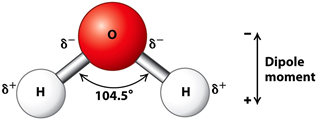
Image source: [alevelbiology.co.uk](https://alevelbiology.co.uk/notes/water-structure-properties/)

Because of its polarity and bent geometry, a water molecule can form up to 4 hydrogen bonds with its neighboring molecules. In solid water (temperatures below 273K), the molecules assume a crystal structure dictated by a vast network hydrogen bonds. This is depicted in the following figure (the green lines represent hydrogen bonds). 
![image](https://chem.libretexts.org/@api/deki/files/37845/icecrystruct.png?revision=1)

Image source: [chem.libretexts.org](https://chem.libretexts.org/Textbook_Maps/General_Chemistry_Textbook_Maps/Map%3A_Chem1_Lower/07%3A_Solids_and_Liquids/7.03%3A_Hydrogen-Bonding_and_Water)

As thermal energy increases, the molecules gain enough kinetic energy to overcome the potential energy of the hydrogen bonds. At this stage, the molecules can exhibit more modes of motion and the molecules can come closer together, increasing density. This is expected in the liquid phase of water (temperatures above 273K and below 373K) (Atkins, 2014). As thermal energy is further increased, water will enter its gasous phase causing density to decrease once again. 

While the properties of water lead to many applications in nature, this study will focus on observing how density is affected by temperature through the persepective of computational chemistry. Methods like MD have been created to model real life phenomena so it can be understood with greater detail. Thus, it is worthwhile to model and analyze one of the most important molecules to life. 



## Methods
This project uses MD to simulate two systems. One model is situated with 2,000 water molecules placed in a spherical simulation box; the other with 8937 water molecules. Initial configurations of the system were deterimined using packmol( Martinez, 2009). For the inital configuration, the particles were placed randomly within the system and the energy was minimized to 0 Kelvin to ensure that the random configuration was probabable in real life. The simulations themselves were run through OpenMM (Eastman, 2017).

Temperature of the system was raised to 300K and then slowly decreased to the temperature of 200K. Once 200K was reached, the system was equilibriated for 1,000 timesteps. A stime step has the equivilance of 500 fs. Following equilibriation, data on the positions of each atom was collected  and saved to a pdb file every 40 timesteps over the span of 4,000 timesteps. Upon complteion of this step, the temperature of the system was raised by 50K. The process of equilibriating for 1,000 timesteps, collecting for 4,000 timesteps every 40 timesteps and rasing the temperature by 50K was repeated 4 more times  so data was available for temperaturs of 250K, 300K, 350K, and 400K. A graphical representation of the simulation is depicted below. (INSERT AN IMAGE!!!!!)

Once the simulation is complete, trajectory files for each temperature was used for analysis to identify the density as a function of radius at each temperature. Further analysis was completed using a numerical method to observe how density changes with respect to radius and comparisions were made between temperatures. To deterimine the density ($\rho$) at a given radius ($r$), the atoms in the simulation were sorted depending on how far away it was located from the center of mass. For consistancy, the number of atoms found between $r_{1}$ and $r_{2}$  where $r_{1}$<$r_{2}$ were said to be at a radius of $r_{1}$. 

### Mathematical Model 

When constructing a molecular dynamics simulation, the net forces felt by each individual atom needs to be calculated in order to estimate the positions of each atom for the next timestep. This includes the intramolecular forces and the intermolecular forces. 

In the case of water, the intramolecular forces include bond stretching and bending. Intermolecular forces include charge to charge, van der Waal, dipole-dipole, and quadrupole interactions. A charge to charge interactions are interaction between charged particles. Van der Waal forces are defined as momentary dipoles caused by nearby particles. Dipole-dipole  interactions result in the interaction between two dipolar molecules and quadruple interactions exhibit interactions dependent on the polarizablility of the molecule. OpenMM uses AMEOBA as a forcefield to calculate the forces felt by each atom (Ponder, 2010). AMEOBA was chosen specifically for its ability to implement and measure quadrupole interactions. Quadrupole interactions are especially important in the case of water because polarizability plays a huge role in the hydrogen bonds that are formed. 

To calculate the positions of the particles at each new time-step, a Langevin integrator was used. A langevin integrator is simply a method, similar to the Verlet method, that calculates the positions of the atoms for the next time step.
    
The Verlet method is a numerical method that integrates the Newton’s equations of motion by taking the Taylor expansion in the forward and backward direction as seen below (Giordano, 2006). 

Forward expansion:
$$
y(t_{i}+\Delta t)= y(t_{i})+\frac{\mathrm{d}y }{\mathrm{d} t}\Delta t+ \frac{1}{2}\frac{\mathrm{d^{2}}y }{\mathrm{d^{2}} t} \Delta t^{2}+\frac{1}{6}\frac{\mathrm{d^{3}} y}{\mathrm{d^{3}} t} \Delta t^{3}+...
$$
Backward expansion:
$$
y(t_{i}-\Delta t)= y(t_{i})-\frac{\mathrm{d}y }{\mathrm{d} t}\Delta t+ \frac{1}{2}\frac{\mathrm{d^{2}} }{\mathrm{d^{2}} t} \Delta t^{2}-\frac{1}{6}\frac{\mathrm{d^{3}} }{\mathrm{d^{3}} t} \Delta t^{3}+...
$$

Adding the two equations and simplifying gives a term to calculate the postition at the next timestep ($y_{i+1}$) by using the current time step ($y_{i}$), the previous time step ($y_{i-1}$), and the accelation of the particle($\frac{\mathrm{d^{2}} y}{\mathrm{d^{2}} t}$) . This is shown below (Giordano, 2006).


Forward + Backward:
$$
y_{i+1} = 2y_{i}-y_{i-1}+\frac{\mathrm{d^{2}} y}{\mathrm{d^{2}} t}(\Delta t^{2}) 
$$

Unlike the Verlet method, the Langevin integrater uses the Langevin equations of motion and these equations have the added ability to control temperature within the system and add friction to the system which is required for the aims of this project (Schiller, 2008). Thus, the term $$\frac{\mathrm{d^{2}} y}{\mathrm{d^{2}} t}(\Delta t^{2})$$ will be replaced with Langevin equations of motion.

From the verlet method, it is clear that this method allows the error term to be an order of $\Delta t$ smaller than the 2nd order Runge-Kutta method and it avoids the calculation of dy/dt. Thus, this calculation provides a smaller numerical error while keeping the calculations relatively simple. However, it is important to note that the $y_{i}$ needs to be provided by to start the algorithm. This value can be determined via another method such as Euler or Runge-Kutta (Giordano,2006).  




### Numerical Method
To get a more precise understanding of the interaction between density and temperature, a numerical dervative will be used to evaluate the rate of change in density with resepect to radius at each temperature. The numerical derivative implements the standard definition of the derivative (see below) with some alterations to improve accuracy. From the standard definition, we cannot take the limit (h-->0). 
$$\frac{\mathrm{df} }{\mathrm{d} x}=\lim_{h \to 0 }\frac{f(x+h)-f(x)}{h}$$

However, by making the size of h small, an approximation can be calculated. Accuracy can be further improved by using the central difference (see below). This alteration to the definition of the derivative still approximates the derivative using the difference between two values of f(x) at points a distance h apart. The only thing that has changed is that the two points are now placed symmetrically around point x. One point is at 0.5h above x and the other is 0.5h below x. 
$$
\frac{\mathrm{d\rho} }{\mathrm{d} r}\approx\frac{\rho(r+h/2)-\rho(r-h/2)}{h}
$$

Since we are taking the derivative of a sampled set of data, we do not know the value of the function at x+0.5h or x-0.5h. Thus, the equation must be altered further to fit this situation. By using points in the sample that are 2h apart the central difference method can be applied. The formula for the central difference will now become:
$$
\frac{\mathrm{d\rho} }{\mathrm{d} r}\approx\frac{\rho(r+h)-\rho(r-h)}{2h}
$$

Where $\rho$ is density, r is the radius from the center of mass of the sphere, and h is the distance between each shell of the sphere (i.e. $r_{x+1}$-$r_{x}$ where x is any radius value). It is important to note that the size of h is limited because smaller h size while sorting leads to increased noise witth-in the data. The only way to smooth the data is by increasing the size of h.  Thus, there must be a balance between increasing accuracy of the numerical derivative and deceasing the noise in the data. 

## Preliminary Results from Simulation Analysis

Once the simulations were complete, they were visualized using VMD software. Visually, it is apparent that the as temperature increases the motion of the molecules also increase. This is consistent with what is expected. As temperature increases, thermal energy within the system also increases and this allows molecules to reach higher energy states and have more kinetic energy. It is difficult to qualitatively compare density because measuring tools were not accessed using VMD. However, because the molecules are moving as theoretically expected, this gives a good sign that the density of water will behave as expected as well.  

The videos are available to watch in the folder called Videos in project repsository

Raw data can be accesed [here.](https://pacificu.box.com/v/WaterSimulationData)

Code for running the simulations is in the file called WaterSimulationCode.ipynb in project repository.

#  Functions

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [74]:


def file_extract(file,numofframes,numofatoms,numofH,numofO):
    """
    Takes a file and extracts the atom type, atom number,
    xposition, ypostion, and zposition. 
    
    Returns a 3D array, called positions, with the depth representing 
    frame numbers, columns representing the atom number(x out of 6000), 
    and the rows represent the x,y,z positions with the first row containing the atom number.
    
    2 other 3D arrays are returned that contain the same information as positions but
    for the hydrogens and oxygens seperately called hydropositions and oxypostions respectively.
    
    A list containing atomtype in order is also given as an output.
    
    Inputs:
    file- pdb file, assumed that file is in the same directory
    numofframes- number of frames contained in pdb file
    numofatoms= number of atoms in simulation
    numofH= number of hydrogen atoms in simulation
    numofO= number of oxygen atoms in simulation
    
    Returns: positions, hydropositions, oxypositions, atomtype
    
    Example:
    >>> file_extract("example.pdb",1,2,1,1)
    (array([[[ 1.,  2.],
            [ 6.,  6.],
            [ 5.,  5.],
            [ 4.,  4.]]]), array([[[ 1.],
            [ 6.],
            [ 5.],
            [ 4.]]]), array([[[ 1.],
            [ 6.],
            [ 5.],
            [ 4.]]]), ['H', 'O'])
    """
        
    file= open(file)
    
    #creates empty lists for the sparsed file to go into
    atomtype=[]
    atomID=[]
    xposition=[]
    yposition=[]
    zposition=[]
    positions= np.empty([numofframes,4,numofatoms])

    HID=[]
    Hxpos=[]
    Hypos=[]
    Hzpos=[]
    hydropositions= np.empty([numofframes,4,numofH])


    OID=[]
    Oxpos=[]
    Oypos=[]
    Ozpos=[]
    oxypositions= np.empty([numofframes,4,numofO])


    for line in file: #for each line in file
        splitline = line.split() #get rid of spaces in each line
        if splitline[0] == "HETATM": #if first element in line has this tag..

            #append the specified element to specified list
            atomID.append(int(splitline[1]))
            xposition.append(float(splitline[-6])) #use decimal function instead????????????
            yposition.append(float(splitline[-5]))
            zposition.append(float(splitline[-4]))
            atomtype.append(splitline[-1])

            for i in range (numofatoms+1):
                if atomID[-1] ==i: #if the last appeneded ID matches an index in the row of the 3D array
                    positions[((len(atomID)-1)//numofatoms),0,i-1]= atomID[-1]
                    positions[((len(atomID)-1)//numofatoms),1,i-1]= xposition[-1]
                    positions[((len(atomID)-1)//numofatoms),2,i-1]= yposition[-1]
                    positions[((len(atomID)-1)//numofatoms),3,i-1]= zposition[-1]



        if splitline[0] == "HETATM" and splitline[-1] == "H": # if the line has tag and is also a hydrogen...
            HID.append(int(splitline[1]))
            Hxpos.append(float(splitline[-6]))
            Hypos.append(float(splitline[-5]))
            Hzpos.append(float(splitline[-4]))

            for i in range (numofH+1):
                if ((2*(HID[-1]+.5))/3) ==i or ((2*(HID[-1]+1))/3) == i :
                    hydropositions[((len(HID)-1)//numofH),0,i-1]= HID[-1]
                    hydropositions[((len(HID)-1)//numofH),1,i-1]= Hxpos[-1]
                    hydropositions[((len(HID)-1)//numofH),2,i-1]= Hypos[-1]
                    hydropositions[((len(HID)-1)//numofH),3,i-1]= Hzpos[-1]  


        if splitline[0] == "HETATM" and splitline[-1] == "O":
            OID.append(int(splitline[1]))
            Oxpos.append(float(splitline[-6]))
            Oypos.append(float(splitline[-5]))
            Ozpos.append(float(splitline[-4]))

            for i in range (numofH+1):
                if OID[-1]/3 ==i:
                    oxypositions[((len(OID)-1)//numofO),0,i-1]= OID[-1]
                    oxypositions[((len(OID)-1)//numofO),1,i-1]= Oxpos[-1]
                    oxypositions[((len(OID)-1)//numofO),2,i-1]= Oypos[-1]
                    oxypositions[((len(OID)-1)//numofO),3,i-1]= Ozpos[-1]  
    return positions,hydropositions,oxypositions, atomtype


  


In [34]:
def COM(positions,numofframes,numofatoms,atomtype):
    """Calculates the center of mass for each frame 
    and returns an array with COMs
    
    arguments:
    
    positions= 3D array: (numofframes,(ID,x,y,z),numofatoms)
    
    numofframes= number of frames in pdb file
    numofatoms= number of atoms from simulation
    atomtype= list of atomtype with index coresspoinding to atomID
    
    returns:
    
    COMs= 2D array that contains the center of mass for each direction (x,y,z) 
    for the rows and columns representing the frame.
    
     Example:
    >>> COM
    """
    
    COMs= np.empty([3,numofframes])
    
    H= 1.00794 #amu
    O= 15.999 #amu

    for n in range(numofframes):
        frame= positions[n,:,:]
        
        x=0
        y=0
        z=0
        totalmass= 0
    
        for i in range(numofatoms):
            if atomtype[i] == "H":
                x += frame[1,i]*H
                y += frame[2,i]*H
                z += frame[3,i]*H
                totalmass += H
            else:
                x += frame[1,i]*O
                y += frame[2,i]*O
                z += frame[3,i]*O
                totalmass += O

        COMs[0,n]= x/totalmass
        COMs[1,n]= y/totalmass
        COMs[2,n]= z/totalmass
        
    return COMs

In [35]:
def sorting(COMs,hydropositions,oxypositions,numofframes,numofH,numofO,shellwidth,rad):
    """Takes positions of hydrogen atoms and oxygen atoms and assignes them
    a bin depedning on how far they are away from the radius.
    
    arguements:
    COMs= 2D array that is 3,numofframes ([(row1=COMx,row2=COMy,row3=COMz),number of frames])
    hydropositons= position data for hydrogens
    oxypositons= position data for oxygens
    numofframes= number of frames
    numofH= number of Hydrogens in simulation
    numofO= number of Oxygens in simulation
    shellwidth= the radius width of each shell
    rad= radius of the sphere from the center of mass
    
    returns:
    radius= 1D array with values that has the cutoff radius for each bin
    atomsortavg= 2D array that has the number of hydrogen atoms for each bin in the first row
             and the number of oxygen atoms for each bin in the second row
    """
    
    #define shells
    radius=np.arange(0,rad,shellwidth)
    
    #blank array to counts in
    atomsort= np.zeros([numofframes,2,len(radius)])
    
    #empty array so the counts can be averaged throughout frames
    atomsortavg= np.empty([2,len(radius)])
    
    #for each frame
    for n in range(numofframes): 
        #unravael nth frame for oxygen and hydrogen arrays, now a 2d array
        frameO= oxypositions[n,:,:]
        frameH= hydropositions[n,:,:]
        
        #extracts the corresponding COM values from the COM array
        COMx= COMs[0,n]
        COMy= COMs[0,n]
        COMz= COMs[0,n]
        
        
    
       
        #for each oxygen atom in  oxygen frame
        print("going through the oxygens")
        for i in range(numofO): 
            #extracts each atom's x,y,and z position
            pointx=frameO[1,i]
            pointy=frameO[2,i]
            pointz=frameO[3,i]
            
            #calculate the distance between the COM and the extracted x,y, and z position
            r= math.sqrt( ( (pointx-COMx)**2 ) + ( (pointy-COMy)**2 ) + ( (pointz-COMz)**2 ) )
            
            print("COM for this frame is",COMx,COMy,COMz)
            print("frame is:",n,
                  "atomnumber is",i,
                  "positions are", pointx,pointy,pointz,
                 "distance between COM and atom is:",r) 
            
            for k in range(len(radius)): # for each radius value
                
                #If the value lies under the radius but above the previous limit
                if (r>radius[k]) and (r<(radius[k]+shellwidth)):
                    print("the bin the atom will be in is:",k)
                    
                    count= atomsort[n,0,k]
                    print("the count for ",k,"th bin is",count)
                    atomsort[n,0,k] = count + 1
                    print("the count is now",atomsort[n,0,k])
                    print("--------------------------------------------------------------------------------------------")
                #If the value happens to lie right on the cutoff, put it in the the cutoff bin
                if r ==k :
                    print("the bin the atom will be in is:",k)
                    count = atomsort[n,0,k]
                    print("the count for ",k,"th bin is",count)
                    atomsort[n,0,k]= count +1
                    print("the count is now",atomsort[n,0,k])
                    print("--------------------------------------------------------------------------------------------")
                    
        
        print("going through hydrogens")
        for i in range(numofH): #for each atom in frame
            pointx=frameH[1,i]
            pointy=frameH[2,i]
            pointz=frameH[3,i]
            
             #calculate the distance between the COM and the extracted x,y, and z position
            r= math.sqrt( ( (pointx-COMx)**2 ) + ( (pointy-COMy)**2 ) + ( (pointz-COMz)**2 ) )
            
            print("COM for this frame is",COMx,COMy,COMz)
            print("frame is:",n,
                  "atomnumber is",i,
                  "positions are", pointx,pointy,pointz,
                 "distance between COM and atom is:",r) 
            
            for k in range(len(radius)): # for each radius value
                
                #If the value lies under the radius but above the previous limit
                if (r>radius[k]) and (r<(radius[k]+shellwidth)):
                    print("the bin the atom will be in is:",k)
                    
                    count= atomsort[n,1,k]
                    print("the count for ",k,"th bin is",count)
                    atomsort[n,1,k] = count + 1
                    print("the count is now",atomsort[n,1,k])
                    print("--------------------------------------------------------------------------------------------")
                #If the value happens to lie right on the cutoff, put it in the the cutoff bin
                if r ==k :
                    print("the bin the atom will be in is:",k)
                    count = atomsort[n,1,k]
                    print("the count for ",k,"th bin is",count)
                    atomsort[n,1,k]= count +1
                    print("the count is now",atomsort[n,1,k])
                    print("--------------------------------------------------------------------------------------------")
    #calculates the average number of atoms in each bin
    for x in range(len(radius)):
        atomsortavg[0,x]= sum(atomsort[:,0,x])/numofframes #avg number of oxygens in the first row
        atomsortavg[1,x]= sum(atomsort[:,1,x])/numofframes #avg number of hydrogens in the second row    
        
    return radius,atomsortavg

In [64]:
def density(radius, atomsortavg,shellwidth):
    """Calculates density of each bin
    
    arguments:
    radius= 1D array with values that has the cutoff radius for each bin
    atomsortavg= 2D array that has the number of hydrogen atoms for each bin in the first row
             and the number of oxygen atoms for each bin in the second row
    shellwidth= the radius width of each shell
    
    returns:
    densitydata= 1D array containing the density at the given radius"""
    
    Hmass= 1.00794/(6.022*10**23)
    Omass= 15.999/(6.022*10**23)
    
    #avg masses in each bin
    Omavgsort= Omass*atomsortavg[0,:]
    Hmavgsort= Hmass*atomsortavg[1,:]
    
    densitydata= np.empty(len(radius))
    
    for i in range(len(radius)):
        binmass= Omavgsort[i]+Hmavgsort[i]
        
        V= (4/3)*math.pi*(((radius[i]+shellwidth)**3)-((radius[i])**3))
        
        densitydata[1,i]= (binmass/V)/(10**-24) #converts g/mol*A^3 to g/cm^3
        #densitydata[0,i]= radius[i]
    return densitydata

In [ ]:
def fulldata(numofframes,numofO,shellwidth,rad,fulldatafilename,pdbfilename):
    """Creates an array with the full data set of densities at each temperature
    and saves it on working directory as a numpy array. 
    
    
    """
    numofH=numofO*2
    temps=[200,250,300,350,400]
    radius=np.arange(0,rad,shellwidth)
    fulldata=np.empty([len(temps),len(radius)])

    for T in range(len(temps)):
        positions,hydropositions,oxypositions,atomtype= file_extract("H2O_Sphere{}K_traj.pdb".format(temps[T]),
                                                                     numofframes,numofatoms,numofH,numofO)
        np.save("{}_positionsdata".format(temp[T]),positions)
        np.save("{}_hydropositionsdata".format(temp[T]),hydropositions)
        np.save("{}_oxypositionsdata".format(temp[T]),oxypositions)
        COMs= COM(positions,numofframes,numofatoms,atomtype)
        radius,atomsortavg= sorting(COMs,hydropositions,oxypositions,numofframes,numofH,numofO,shellwidth,rad)
        np.save("{}_atomsortavg".format(temp[T]),atomsortavg)
        densitydata= density(radius, atomsortavg, shellwidth)
        fulldata[T,:]=densitydata
    np.save("{}".format(fulldatafilename),fulldata)

In [ ]:
def numderivative(fulldata,radius,shellwidth):
    
    """calculates a numerical derivative for the data set using the central difference method
    
    """
    
    dradius= radius[1;len(radius)-1]
    derivative=np.zeros([5,len(radius)-2])
    
    for i in range(1,len(radius)-1):
        for k in range(5):
            derivative[k,i-1]=(fulldata[k,i+1]- fulldata[k,i-1])/(2*shellwidth)
    return dradius,derivative

In [97]:
def densityplots(dataset,radiusdataset,indexcutoff,title):
    
    cutoffradius= radiusdataset[:indexcutoff]
    
    
    k200=dataset[0,:indexcutoff]
    k250=dataset[1,:indexcutoff]
    k300=dataset[2,:indexcutoff]
    k350=dataset[3,:indexcutoff]
    k400=dataset[4,:indexcutoff]
    
    
    plt.figure(figsize=(15,5))
    plt.plot(cutoffradius,k200,label="200 Kelvin")
    plt.plot(cutoffradius,k250,label="250 Kelvin")
    plt.plot(cutoffradius,k300,label="300 Kelvin")
    plt.plot(cutoffradius,k350,label="350 Kelvin")
    plt.plot(cutoffradius,k400,label="400 Kelvin")
    plt.xlabel("radius (angstroms)")
    plt.ylabel("density (g/cm^3)")
    plt.title("{}".format(title))
    plt.legend(loc='best')


In [ ]:
##Constants for simulation 1
###############################################################################################
numofframes= 100
numofO=2000
shellwidth= 2 #units of Angstroms
rad=100
fulldatafilename= fulldata
###############################################################################################
fulldata(numofframes,numofO,shellwidth,rad,fulldatafilename)


##Constants for simulation 2
###############################################################################################
numofframes= 160
numofO=8937
shellwidth= 2 #units of Angstroms
rad=450
fulldatafilename= LargeSimFullData
###############################################################################################
fulldata(numofframes,numofO,shellwidth,rad,fulldatafilename)

## Results

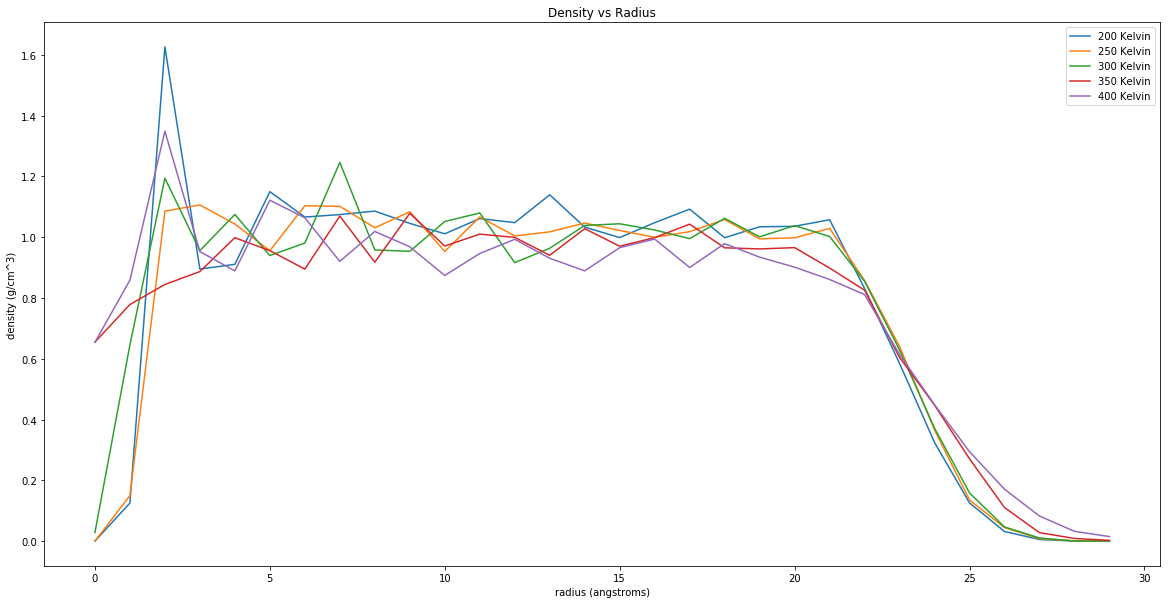

In [96]:
#Plotting small simulation

fulldata= np.load("fulldata.npy")
radius= np.arange(0,100,1)

densityplots(fulldata,radius,30,"Density vs Radius")

(0, 33)

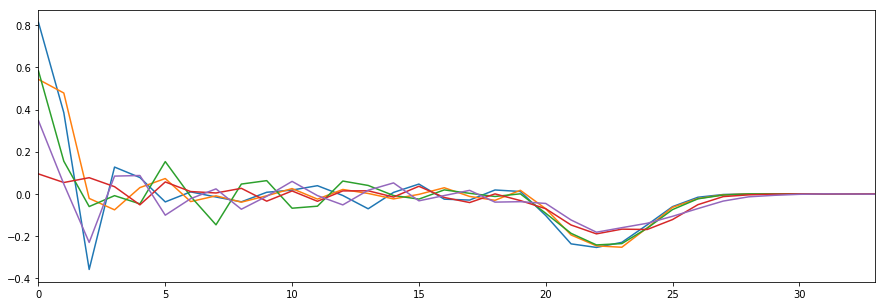

In [88]:
#Numerical Method

shellwidth=1

derivative=np.zeros([5,len(radius)-2])


numderivative(fulldata,radius,shellwidth)

for i in range(1,len(radius)-1):
    for k in range(5):
        derivative[k,i-1]=(fulldata[k,i+1]- fulldata[k,i-1])/(2*shellwidth)

x=np.arange(0,98,1)

k1=derivative[0,:] #200
k2=derivative[1,:] #250
k3=derivative[2,:] #300
k4=derivative[3,:] #350
k5=derivative[4,:] #400  

plt.figure(figsize=(15,5))
plt.plot(x,k1)
plt.plot(x,k2)
plt.plot(x,k3)
plt.plot(x,k4)
plt.plot(x,k5)
plt.xlim([0,33])


In [73]:
import doctest
doctest.testmod()

TestResults(failed=0, attempted=1)

## References

1. Atkins, P. Physical Chemistry: Thermodynamics, structure, and change; Macmillan Higher Education: 2014; .

2. Ponder, J. W.; Wu, C.; Ren, P.; Pande, V. S.; Chodera, J. D.; Schnieders, M. J.; Haque, I.; Mobley, D. L.; Lambrecht, D. S.; DiStasio Jr, R. A. Current status of the AMOEBA polarizable force field. The journal of physical chemistry B 2010, 114, 2549-2564.

3. Schiller, U. D. An overview of integration schemes for molecular dynamics simulations. Lecture note 2008.

4. Giordano, N. J. Computational physics; Pearson Education India: 2006; .

5. Eastman, P.; Swails, J.; Chodera, J. D.; McGibbon, R. T.; Zhao, Y.; Beauchamp, K. A.; Wang, L.; Simmonett, A. C.; Harrigan, M. P.; Stern, C. D. OpenMM 7: rapid development of high performance algorithms for molecular dynamics. PLoS computational biology 2017, 13, e1005659.

6. Perlman, H.; USGS. The water in you https://water.usgs.gov/edu/propertyyou.html (accessed May 12, 2018).

7.  Martinez, L.; Andrade, R.; Birgin, E. G.; Martinez, J. M. PACKMOL: a package for building initial configurations for molecular dynamics simulations. Journal of computational chemistry 2009, 30, 2157-2164.

# Testing bugs

In [11]:
import numpy as np

tpositions=np.zeros([2,4,5])
th= np.zeros([2,4,3])
to=np.zeros([2,4,2])

for i in range(5):
    tpositions[0,0,i]=i+1
    tpositions[1,0,i]=i+1
tpositions[0,1,1],tpositions[0,1,2],tpositions[0,1,4],tpositions[0,1,0]= 1.5,1.5,1.5,1
tpositions[1,1,1],tpositions[1,1,2],tpositions[1,1,4],tpositions[1,1,0]= 1.5,1.5,1.5,1
print(tpositions)

for i in range(3):
    th[0,0,i]=i+1
    th[1,0,i]=i+1
th[0,1,0],th[0,1,1],th[0,1,2]=1,1.5,1.5
th[1,1,0],th[1,1,1],th[1,1,2]=1,1.5,1.5

for i in range(2):
    to[0,0,i]=i+4
    to[1,0,i]=i+4
to[0,1,1]=1.5
to[1,1,1]=1.5

ttype=["H","H","H","O","O"]
print("test H",th)
print("test O",to)

[[[ 1.   2.   3.   4.   5. ]
  [ 1.   1.5  1.5  0.   1.5]
  [ 0.   0.   0.   0.   0. ]
  [ 0.   0.   0.   0.   0. ]]

 [[ 1.   2.   3.   4.   5. ]
  [ 1.   1.5  1.5  0.   1.5]
  [ 0.   0.   0.   0.   0. ]
  [ 0.   0.   0.   0.   0. ]]]
test H [[[ 1.   2.   3. ]
  [ 1.   1.5  1.5]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 [[ 1.   2.   3. ]
  [ 1.   1.5  1.5]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]]
test O [[[ 4.   5. ]
  [ 0.   1.5]
  [ 0.   0. ]
  [ 0.   0. ]]

 [[ 4.   5. ]
  [ 0.   1.5]
  [ 0.   0. ]
  [ 0.   0. ]]]


In [12]:
tcoms=COM(tpositions,2,5,ttype)
print(tcoms)

[[ 0.8003656  0.8003656]
 [ 0.         0.       ]
 [ 0.         0.       ]]


In [44]:
import math
radius,sortavg=sorting(tcoms,th,to,2,3,2,2,5)

print(sortavg)

going through the oxygens
COM for this frame is 0.800365600646 0.800365600646 0.800365600646
frame is: 0 atomnumber is 0 positions are 0.0 0.0 0.0 distance between COM and atom is: 1.3862738849484577
the bin the atom will be in is: 0
the count for  0 th bin is 0.0
the count is now 1.0
--------------------------------------------------------------------------------------------
COM for this frame is 0.800365600646 0.800365600646 0.800365600646
frame is: 0 atomnumber is 1 positions are 1.5 0.0 0.0 distance between COM and atom is: 1.3306609193004313
the bin the atom will be in is: 0
the count for  0 th bin is 1.0
the count is now 2.0
--------------------------------------------------------------------------------------------
going through hydrogens
COM for this frame is 0.800365600646 0.800365600646 0.800365600646
frame is: 0 atomnumber is 0 positions are 1.0 0.0 0.0 distance between COM and atom is: 1.1493581177331151
the bin the atom will be in is: 0
the count for  0 th bin is 0.0
the c

In [59]:
densitydata= density(radius, sortavg,2)
print(densitydata)

binmass is 5.8156459648e-23
radius[i]+shellwidth 2
(radius[i] 0
volume of bin is 33.5103216383
density of bin 0 is 1.73547900482
binmass is 0.0
radius[i]+shellwidth 4
(radius[i] 2
volume of bin is 234.572251468
density of bin 2 is 0.0
binmass is 0.0
radius[i]+shellwidth 6
(radius[i] 4
volume of bin is 636.696111128
density of bin 4 is 0.0
[[ 0.        2.        4.      ]
 [ 1.735479  0.        0.      ]]


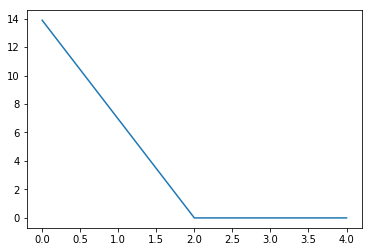

In [52]:
import matplotlib.pylab as plt

x= densitydata[0,:]
y= densitydata[1,:]
plt.plot(x,y)


In [62]:
x=np.zeros([3])

In [69]:
print(file_extract("example.pdb",1,2,1,1))


(array([[[ 1.,  2.],
        [ 6.,  6.],
        [ 5.,  5.],
        [ 4.,  4.]]]), array([[[ 1.],
        [ 6.],
        [ 5.],
        [ 4.]]]), array([[[ 1.],
        [ 6.],
        [ 5.],
        [ 4.]]]), ['H', 'O'])


In [75]:
import doctest
doctest.testmod()


TestResults(failed=0, attempted=1)

In [1]:
print(130/2)

65.0


In [3]:
import numpy as np
radius=np.arange(0,130,2)
print(radius)

[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128]


In [5]:
print(radius[64])

128


In [9]:
fulldata=np.zeros([3,3])

density=np.array([1,2,3],int)
fulldata[1,:]=density[:]
print(fulldata)

[[ 0.  0.  0.]
 [ 1.  2.  3.]
 [ 0.  0.  0.]]
